# Biulding Regression model on the data scraped from Realtor.ca 

In [0]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/733')

home_dir = os.getcwd()
#x
#os.chdir('./part_files')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Load the scrapped data 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# train=pd.read_csv("realtor_properties_details_web.csv")
train=pd.read_csv("Realtor_data.csv") # the semi preprocessed data. 

train.columns

#cleaning the data 

clean the features which has un necessary details (extra characters )

clean the feature "land_size_interior"

In [0]:
train['land_size_interior']   =   train['land_size_interior'].str.split("sqft", n = 1, expand = True)


clean the feature "land_size"

In [0]:
# convert where ever there is acre to sqft, else just take the existing sqft
def check_AcreOrSqft(x):
  
  if x.find("ac") != -1:
    z = [float(s) for s in x.split() if s.isdigit()]
    if not z:
      return None
    z = z[0]* 43560.0
  else:
    
    y =  [float(s) for s in x.split() if s.isdigit()]
    if not y:
      return None
    z = y[0]
  
  return z
  
    

In [0]:
train['land_size'] = train['land_size'].map(lambda x: check_AcreOrSqft(str(x)))

In [0]:
train['property_tax']=train['property_tax'].str.replace('$','')
train['property_tax']=train['property_tax'].str.replace(',','')
train['property_tax']=train['property_tax'].str.split('(',expand=True)[0]
#train.to_csv('Tax_clean.csv')

In [0]:
def check_symbols(x):
  
  if x.find("+") != -1:
    z = [float(s) for s in x.split() if s.isdigit()]
    if not z:
      return None
    z = float(z[0] + z[1])
  else:

    z = float(x)
  
  return z
  

In [0]:
train['bedrooms'] = train['bedrooms'].map(lambda x: check_symbols(str(x)))

In [0]:
train.columns

Index(['Unnamed: 0', '_c0', 'cafes', 'car_friendly', 'cycling_friendly',
       'daycares', 'groceries', 'high_schools', 'mls', 'nightlife', 'parks',
       'pedestrian_friendly', 'primary_schools', 'quiet', 'restaurants',
       'shopping', 'transit_friendly', 'vibrant', 'absoluteUrl', 'address',
       'ammenities', 'bathrooms', 'bedrooms', 'land_size',
       'land_size_interior', 'lat', 'lng', 'ownership_type', 'postal_code',
       'price', 'property_type', 'property_type_identifier', 'size',
       'total_price', 'type', 'type_id', 'unit', 'building_type',
       'num_stories', 'title', 'built_in', 'property_tax', 'parking_space',
       'STREET_NAME', 'joined_columns', 'joinKey', 'joinKey1', '_c0.1',
       'Unnamed: 0.1', 'ADDRESS', 'BIG_IMPROVEMENT_YEAR', 'BLOCK',
       'CURRENT_IMPROVEMENT_VALUE', 'CURRENT_LAND_VALUE', 'DISTRICT_LOT',
       'FOLIO', 'FROM_CIVIC_NUMBER', 'LAND_COORDINATE', 'LEGAL_TYPE', 'LOT',
       'NARRATIVE_LEGAL_LINE1', 'NARRATIVE_LEGAL_LINE2',
       '

selection only necessory features from the CSV

In [0]:
train =  train[['cafes', 'car_friendly', 'cycling_friendly','daycares', 'groceries', 'high_schools', 'nightlife', 'parks','pedestrian_friendly', 'primary_schools', 'quiet', 'restaurants', 'shopping', 'transit_friendly', 'vibrant', 'ammenities', 'bathrooms',  'bedrooms', 'land_size', 'land_size_interior', 'ownership_type', 'postal_code', 'property_type','property_type_identifier', 'total_price', 'type', 'num_stories' , 'title','built_in', 'property_tax', 'parking_space', 'CURRENT_LAND_VALUE', 'BIG_IMPROVEMENT_YEAR', 'CURRENT_IMPROVEMENT_VALUE', 'LEGAL_TYPE', 'PREVIOUS_IMPROVEMENT_VALUE', 'PREVIOUS_LAND_VALUE', 'TAX_ASSESSMENT_YEAR', 'TAX_LEVY', 'YEAR_BUILT']]

In [0]:
train.columns

Index(['cafes', 'car_friendly', 'cycling_friendly', 'daycares', 'groceries',
       'high_schools', 'nightlife', 'parks', 'pedestrian_friendly',
       'primary_schools', 'quiet', 'restaurants', 'shopping',
       'transit_friendly', 'vibrant', 'ammenities', 'bathrooms', 'bedrooms',
       'land_size', 'land_size_interior', 'ownership_type', 'postal_code',
       'property_type', 'property_type_identifier', 'total_price', 'type',
       'num_stories', 'title', 'built_in', 'property_tax', 'parking_space',
       'CURRENT_LAND_VALUE', 'BIG_IMPROVEMENT_YEAR',
       'CURRENT_IMPROVEMENT_VALUE', 'LEGAL_TYPE', 'PREVIOUS_IMPROVEMENT_VALUE',
       'PREVIOUS_LAND_VALUE', 'TAX_ASSESSMENT_YEAR', 'TAX_LEVY', 'YEAR_BUILT'],
      dtype='object')

#Handling the missing values 

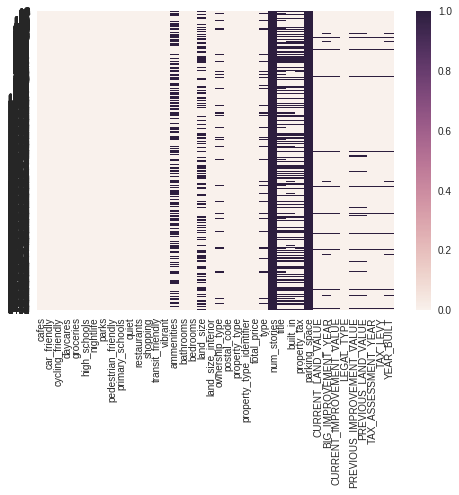

In [0]:
sns.heatmap(train.isnull())
#plt.subplots(figsize=(35,10))
plt.show()

###missing value handling for categorical variables

In [0]:
nan=(train.isnull().sum(axis=0))/len(train)
nan*100

cafes                           0.000000
car_friendly                    0.000000
cycling_friendly                0.000000
daycares                        0.000000
groceries                       0.000000
high_schools                    0.000000
nightlife                       0.000000
parks                           0.000000
pedestrian_friendly             0.000000
primary_schools                 0.000000
quiet                           0.000000
restaurants                     0.000000
shopping                        0.000000
transit_friendly                0.000000
vibrant                         0.000000
ammenities                     47.102912
bathrooms                       0.000000
bedrooms                        0.000000
land_size                      37.157682
land_size_interior              0.000000
ownership_type                 10.377630
postal_code                     0.000000
property_type                   0.000000
property_type_identifier        0.000000
total_price     

In [0]:
#Removal due to high percentage of Nan
train=train.drop(['parking_space','ammenities','num_stories'],axis=1)

###missing value handling for numarical variables

From the above observation, there are still some numarical variables which are having null values

they are : 

1. land_size   ( using liner interpolation )

2. num_stories   ( more than 80 % data missing, remove the field )

3. property_tax ( using linear interpolation)

4. parking_space ( more than the 90 % of the data missing, remove the feature)
5. built_in   ( use interpolation method zero )

also other numarical features having missing values are : 

cafes                        
car_friendly                
cycling_friendly            
daycares                     
groceries                    
high_schools                
nightlife                    
parks                        
pedestrian_friendly         
primary_schools              
quiet                        
restaurants                  
shopping                     
transit_friendly            
vibrant                      



###Missing value handling through interpolation  and imputation  for both cat and continu vars

In [0]:
train["land_size"] = pd.to_numeric(train["land_size"])
train["bedrooms"] = pd.to_numeric(train["bedrooms"])
#train["property_tax"] = pd.to_numeric(train["property_tax"])
train['land_size']= train['land_size'].apply(pd.to_numeric)#.interpolate(method = 'linear')
train['property_tax'] = train['property_tax'].apply(pd.to_numeric)#.interpolate(method = 'linear')
train['built_in'] = train['built_in'].apply(pd.to_numeric)#.interpolate(method = 'zero')
train['ownership_type'] = train['ownership_type'].fillna(train.ownership_type.mode)
train['type'] = train['type'].fillna(train.type.mode)
train['title'] = train['title'].fillna(train.title.mode)

#train=train.interpolate(method='linear')
train['cafes'] = train['cafes'].interpolate(method = 'linear')
train['high_schools'] = train['high_schools'].interpolate(method = 'linear')
train['groceries'] = train['groceries'].interpolate(method = 'linear')
train['restaurants'] = train['restaurants'].interpolate(method = 'linear')
train['car_friendly'] = train['car_friendly'].interpolate(method = 'linear')
train['cycling_friendly'] = train['cycling_friendly'].interpolate(method = 'linear')
train['daycares'] = train['daycares'].interpolate(method = 'linear')
train['high_schools'] = train['high_schools'].interpolate(method = 'linear')
train['shopping'] = train['shopping'].interpolate(method = 'linear')
train['transit_friendly'] = train['transit_friendly'].interpolate(method = 'linear')
train['vibrant'] = train['vibrant'].interpolate(method = 'linear')
train['quiet'] = train['quiet'].interpolate(method = 'linear')
train['nightlife'] = train['nightlife'].interpolate(method = 'linear')
train['parks'] = train['parks'].interpolate(method = 'linear')
train['pedestrian_friendly'] = train['pedestrian_friendly'].interpolate(method = 'linear')
train['primary_schools'] = train['primary_schools'].interpolate(method = 'linear')

train['CURRENT_LAND_VALUE'] = train['CURRENT_LAND_VALUE'].interpolate(method = 'linear')
train['BIG_IMPROVEMENT_YEAR'] = train['BIG_IMPROVEMENT_YEAR'].interpolate(method = 'linear')
train['CURRENT_IMPROVEMENT_VALUE'] = train['CURRENT_IMPROVEMENT_VALUE'].interpolate(method = 'linear')
train['PREVIOUS_IMPROVEMENT_VALUE'] = train['PREVIOUS_IMPROVEMENT_VALUE'].interpolate(method = 'linear')
train['PREVIOUS_LAND_VALUE'] = train['PREVIOUS_LAND_VALUE'].interpolate(method = 'linear')
train['TAX_ASSESSMENT_YEAR'] = train['TAX_ASSESSMENT_YEAR'].interpolate(method = 'linear')
train['TAX_LEVY'] = train['TAX_LEVY'].interpolate(method = 'linear')
train['YEAR_BUILT'] = train['YEAR_BUILT'].interpolate(method = 'linear')


In [0]:
nan=(train.isnull().sum(axis=0))/len(train)
nan*100

cafes                          0.000000
car_friendly                   0.000000
cycling_friendly               0.000000
daycares                       0.000000
groceries                      0.000000
high_schools                   0.000000
nightlife                      0.000000
parks                          0.000000
pedestrian_friendly            0.000000
primary_schools                0.000000
quiet                          0.000000
restaurants                    0.000000
shopping                       0.000000
transit_friendly               0.000000
vibrant                        0.000000
bathrooms                      0.000000
bedrooms                       0.000000
land_size                     37.157682
land_size_interior             0.000000
ownership_type                 0.000000
postal_code                    0.000000
property_type                  0.000000
property_type_identifier       0.000000
total_price                    0.000000
type                           0.000000


In [0]:
train['land_size'] = train['land_size'].interpolate(method = 'linear')
train['property_tax'] = train['property_tax'].interpolate(method = 'linear')
train['built_in'] = train['built_in'].interpolate(method = 'zero')

In [0]:
nan=(train.isnull().sum(axis=0))/len(train)
nan*100

cafes                         0.000000
car_friendly                  0.000000
cycling_friendly              0.000000
daycares                      0.000000
groceries                     0.000000
high_schools                  0.000000
nightlife                     0.000000
parks                         0.000000
pedestrian_friendly           0.000000
primary_schools               0.000000
quiet                         0.000000
restaurants                   0.000000
shopping                      0.000000
transit_friendly              0.000000
vibrant                       0.000000
bathrooms                     0.000000
bedrooms                      0.000000
land_size                     0.057654
land_size_interior            0.000000
ownership_type                0.000000
postal_code                   0.000000
property_type                 0.000000
property_type_identifier      0.000000
total_price                   0.000000
type                          0.000000
title                    

#separating categorical and numeric columns

###these are the total number of features taking into account from the data

### These are the numarical columns 

In [0]:
numarical_train  = train[['cafes', 'car_friendly', 'cycling_friendly','daycares', 'groceries', 'high_schools', 'nightlife', 'parks','pedestrian_friendly', 'primary_schools', 'quiet', 'restaurants', 'shopping', 'transit_friendly', 'vibrant', 'bathrooms',  'bedrooms', 'land_size', 'land_size_interior', 'built_in', 'property_tax','CURRENT_LAND_VALUE', 'BIG_IMPROVEMENT_YEAR', 'CURRENT_IMPROVEMENT_VALUE', 'PREVIOUS_IMPROVEMENT_VALUE', 'PREVIOUS_LAND_VALUE', 'TAX_ASSESSMENT_YEAR', 'TAX_LEVY', 'YEAR_BUILT', 'total_price']] 
len(numarical_train.columns)

30

In [0]:
numarical_train['TAX_ASSESSMENT_YEAR']

0       2018.0
1       2018.0
2       2018.0
3       2018.0
4       2018.0
5       2018.0
6       2018.0
7       2018.0
8       2018.0
9       2018.0
10      2018.0
11      2018.0
12      2018.0
13      2018.0
14      2018.0
15      2018.0
16      2018.0
17      2018.0
18      2018.0
19      2018.0
20      2018.0
21      2018.0
22      2018.0
23      2018.0
24      2018.0
25      2018.0
26      2018.0
27      2018.0
28      2018.0
29      2018.0
         ...  
3439    2018.0
3440    2018.0
3441    2018.0
3442    2018.0
3443    2018.0
3444    2018.0
3445    2018.0
3446    2018.0
3447    2018.0
3448    2018.0
3449    2018.0
3450    2018.0
3451    2018.0
3452    2018.0
3453    2018.0
3454    2018.0
3455    2018.0
3456    2018.0
3457    2018.0
3458    2018.0
3459    2018.0
3460    2018.0
3461    2018.0
3462    2018.0
3463    2018.0
3464    2018.0
3465    2018.0
3466    2018.0
3467    2018.0
3468    2018.0
Name: TAX_ASSESSMENT_YEAR, Length: 3469, dtype: float64

###Make sure the data type of each numarical column

# numarical_train.describe()



###Convertig the numarical columns to float64 

In [0]:
numarical_train["land_size_interior"] = pd.to_numeric(numarical_train["land_size_interior"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
numarical_train.dtypes

cafes                         float64
car_friendly                  float64
cycling_friendly              float64
daycares                      float64
groceries                     float64
high_schools                  float64
nightlife                     float64
parks                         float64
pedestrian_friendly           float64
primary_schools               float64
quiet                         float64
restaurants                   float64
shopping                      float64
transit_friendly              float64
vibrant                       float64
bathrooms                     float64
bedrooms                      float64
land_size                     float64
land_size_interior              int64
built_in                      float64
property_tax                  float64
CURRENT_LAND_VALUE            float64
BIG_IMPROVEMENT_YEAR          float64
CURRENT_IMPROVEMENT_VALUE     float64
PREVIOUS_IMPROVEMENT_VALUE    float64
PREVIOUS_LAND_VALUE           float64
TAX_ASSESSME

### These features are Catogorical 

In [0]:
catogorical_train = train[['ownership_type', 'property_type' , 'property_type_identifier', 'type', 'title', 'postal_code', 'LEGAL_TYPE']]
len(catogorical_train.columns)

7

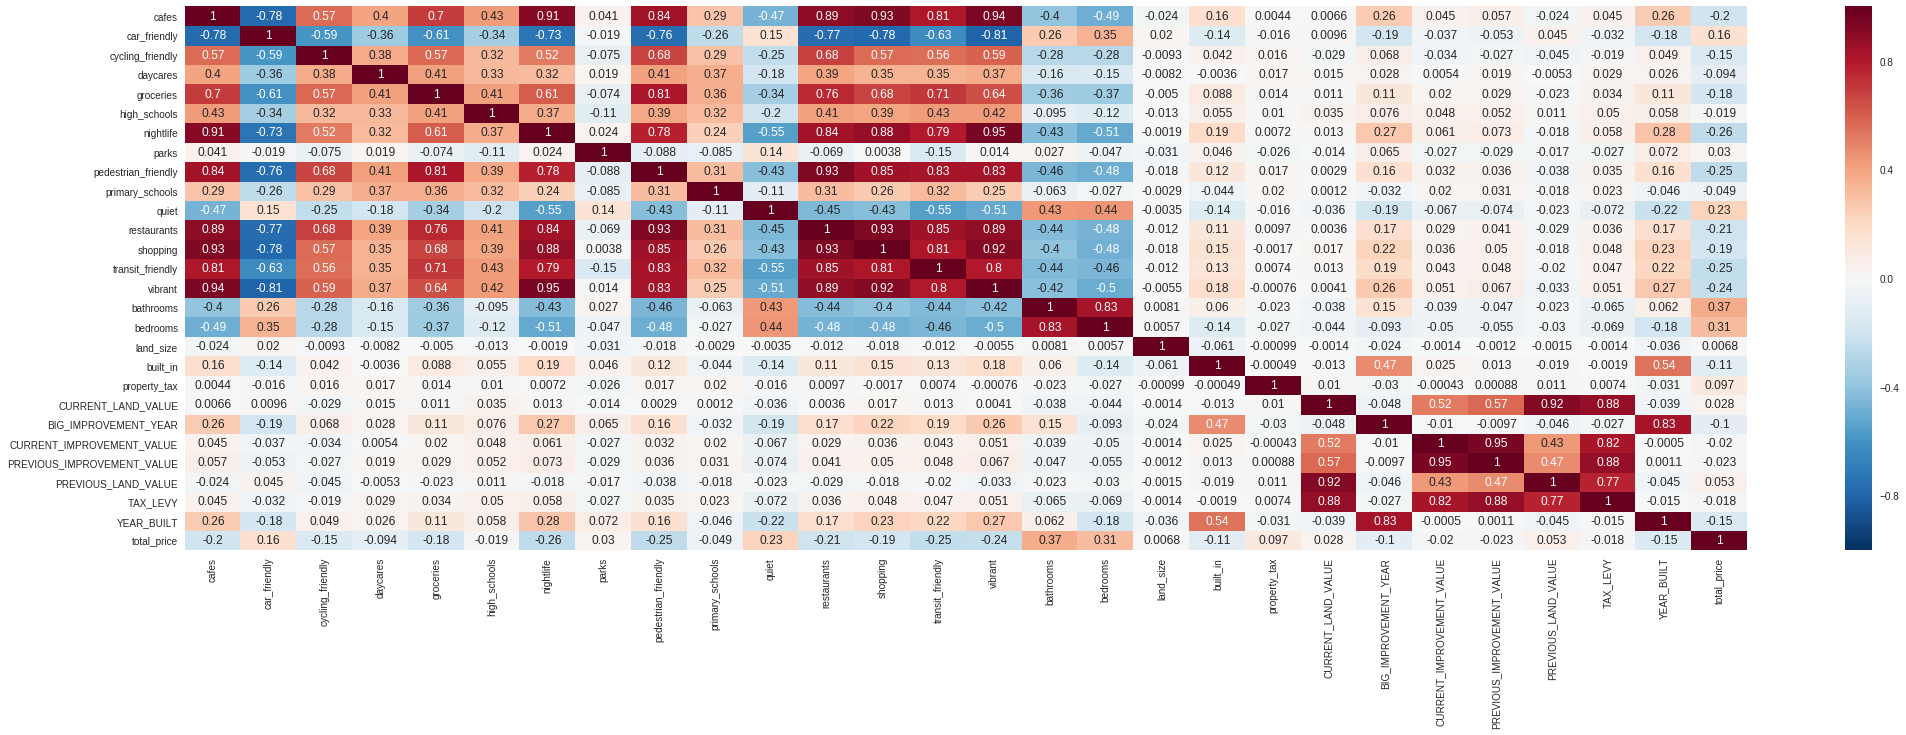

In [0]:
numarical_train1 = train[['cafes', 'car_friendly', 'cycling_friendly','daycares', 'groceries', 'high_schools', 'nightlife', 'parks','pedestrian_friendly', 'primary_schools', 'quiet', 'restaurants', 'shopping', 'transit_friendly', 'vibrant', 'bathrooms',  'bedrooms', 'land_size', 'land_size_interior', 'built_in', 'property_tax','CURRENT_LAND_VALUE', 'BIG_IMPROVEMENT_YEAR', 'CURRENT_IMPROVEMENT_VALUE', 'PREVIOUS_IMPROVEMENT_VALUE', 'PREVIOUS_LAND_VALUE', 'TAX_LEVY', 'YEAR_BUILT', 'total_price']] 
corr = numarical_train1.corr()
plt.subplots(figsize=(35,10))
sns.heatmap(corr, annot=True)

 ### we can observe from the last column of above corelation matrix how features are effecting the target feature "total_price" bases on the color intencity 

These are the corelation values for numaric variables with respect to the total_price

In [0]:
numarical_train1 = numarical_train
numarical_train1.drop("total_price", axis=1).apply(lambda x: x.corr(numarical_train1.total_price))

cafes                        -0.198998
car_friendly                  0.160355
cycling_friendly             -0.148801
daycares                     -0.093935
groceries                    -0.184229
high_schools                 -0.019332
nightlife                    -0.256435
parks                         0.030135
pedestrian_friendly          -0.251340
primary_schools              -0.049237
quiet                         0.234190
restaurants                  -0.209350
shopping                     -0.186057
transit_friendly             -0.247096
vibrant                      -0.237209
bathrooms                     0.374206
bedrooms                      0.305850
land_size                     0.006790
land_size_interior            0.571822
built_in                     -0.111861
property_tax                  0.097105
CURRENT_LAND_VALUE            0.027644
BIG_IMPROVEMENT_YEAR         -0.102369
CURRENT_IMPROVEMENT_VALUE    -0.020500
PREVIOUS_IMPROVEMENT_VALUE   -0.022637
PREVIOUS_LAND_VALUE      

Now we see how the each numaric variable is corelated with the target variable, and we also try to draw the regression line for bi-variaent graphs. The thick dark line represents the regression line for those particular 2 variables. 

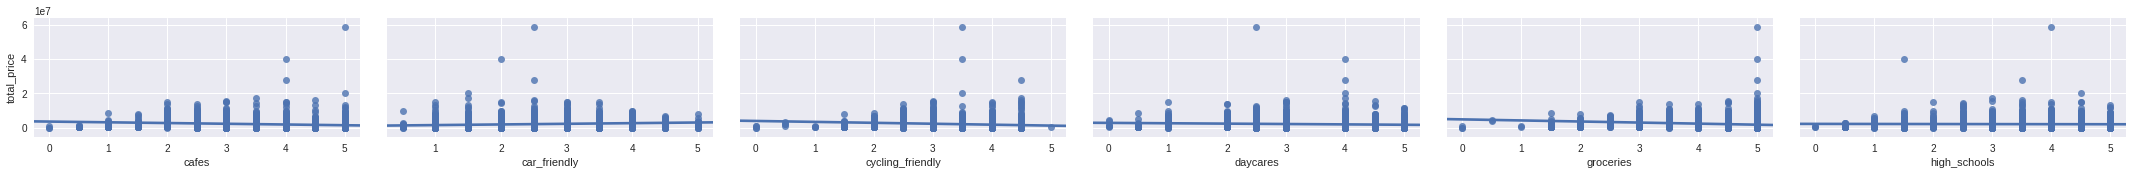

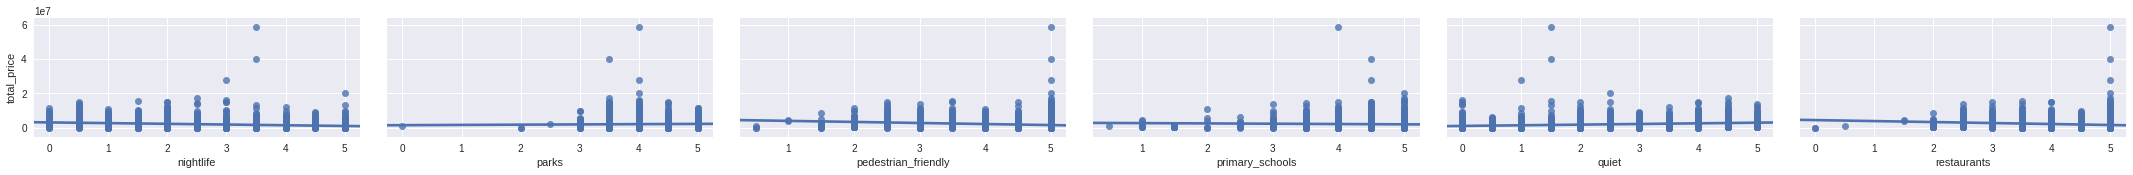

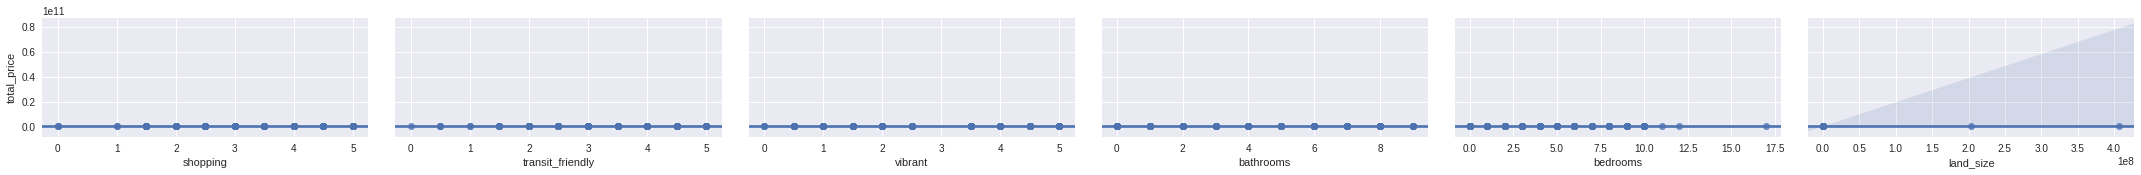

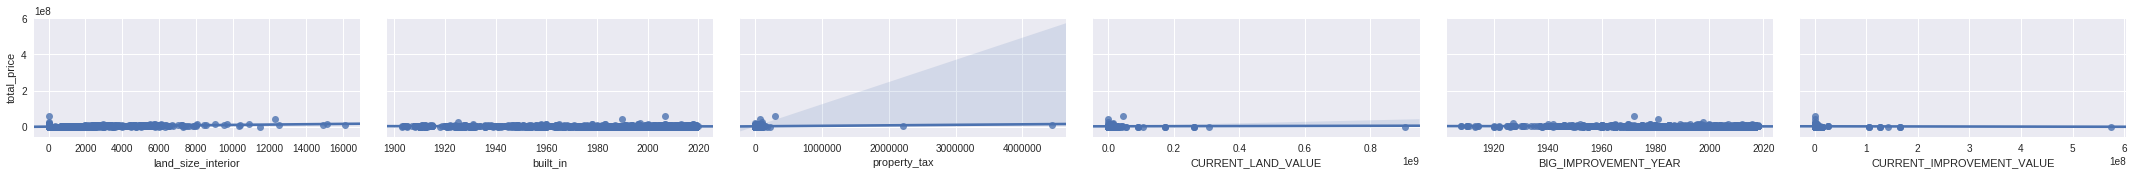

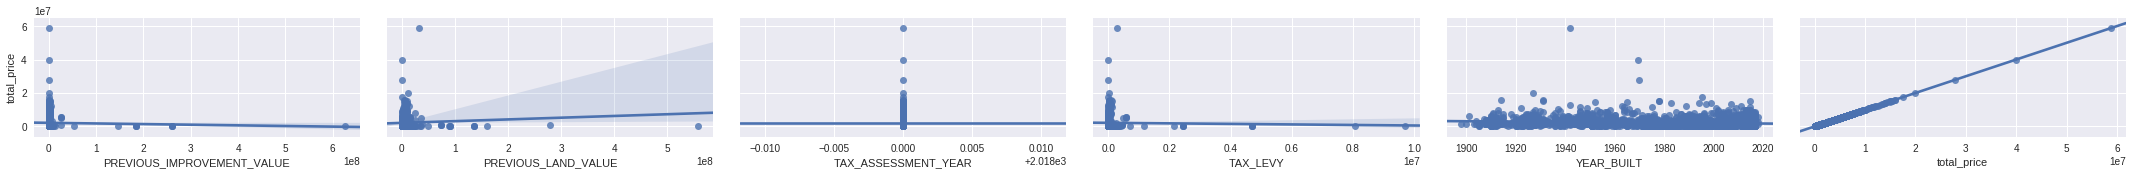

In [0]:
for i in range(0, len(numarical_train.columns), 6):
  #print(i)
  if i == 18:
    #print(i)
    sns.pairplot(data=numarical_train, x_vars=numarical_train.columns[18:18+6], y_vars=['total_price'], kind = "reg", aspect = 2)
  else:
    #print(i)
    sns.pairplot(data=numarical_train, x_vars=numarical_train.columns[i:i+6], y_vars=['total_price'], kind = "reg", aspect = 2)

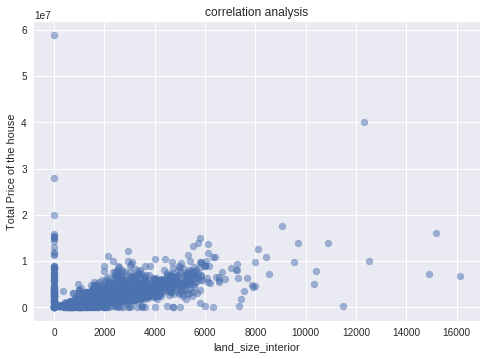

In [0]:
import matplotlib.pyplot as plt

plt.scatter(numarical_train.land_size_interior, numarical_train.total_price,   alpha=0.5)
plt.title('correlation analysis')
plt.xlabel('land_size_interior')
plt.ylabel('Total Price of the house')
plt.show()

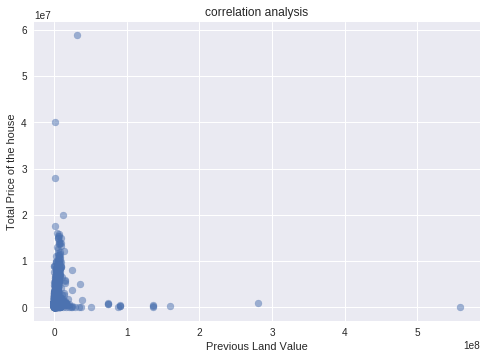

In [0]:
import matplotlib.pyplot as plt

plt.scatter(numarical_train.PREVIOUS_LAND_VALUE, numarical_train.total_price,   alpha=0.5)
plt.title('correlation analysis')
plt.xlabel('Previous Land Value')
plt.ylabel('Total Price of the house')
plt.show()

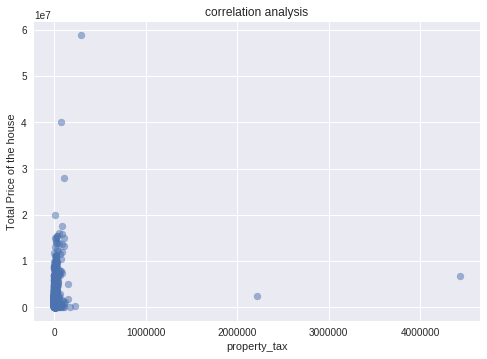

In [0]:
import matplotlib.pyplot as plt

plt.scatter(numarical_train.property_tax, numarical_train.total_price,   alpha=0.5)
plt.title('correlation analysis')
plt.xlabel('property_tax')
plt.ylabel('Total Price of the house')
plt.show()


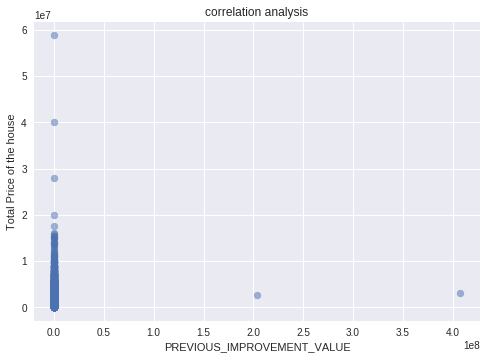

In [0]:
import matplotlib.pyplot as plt

plt.scatter(numarical_train.PREVIOUS_IMPROVEMENT_VALUE, numarical_train.total_price,   alpha=0.5)
plt.title('correlation analysis')
plt.xlabel('PREVIOUS_IMPROVEMENT_VALUE')
plt.ylabel('Total Price of the house')
plt.show()

In [0]:
catogorical_train = train[['property_type' , 'property_type_identifier','postal_code', 'LEGAL_TYPE']]
len(catogorical_train.columns)

4

In [0]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
new_catogorical_train= dummyEncode(catogorical_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [0]:
train[['property_type' , 'property_type_identifier','postal_code', 'LEGAL_TYPE']]

,property_type,property_type_identifier,postal_code,LEGAL_TYPE
0,Single Family,residential,V5X,STRATA
1,Single Family,residential,V6S,LAND
2,Single Family,residential,V6M,LAND
3,Single Family,residential,V5P,LAND
4,Single Family,residential,V5M,LAND
5,Single Family,residential,V6C,STRATA
6,Single Family,residential,V6B,STRATA
7,Single Family,residential,V5P,STRATA
8,Retail,Commercial,V6H,LAND
9,Business,Commercial,V5H,STRATA


### The following graph explains how the interioe land size effects the price ranges

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


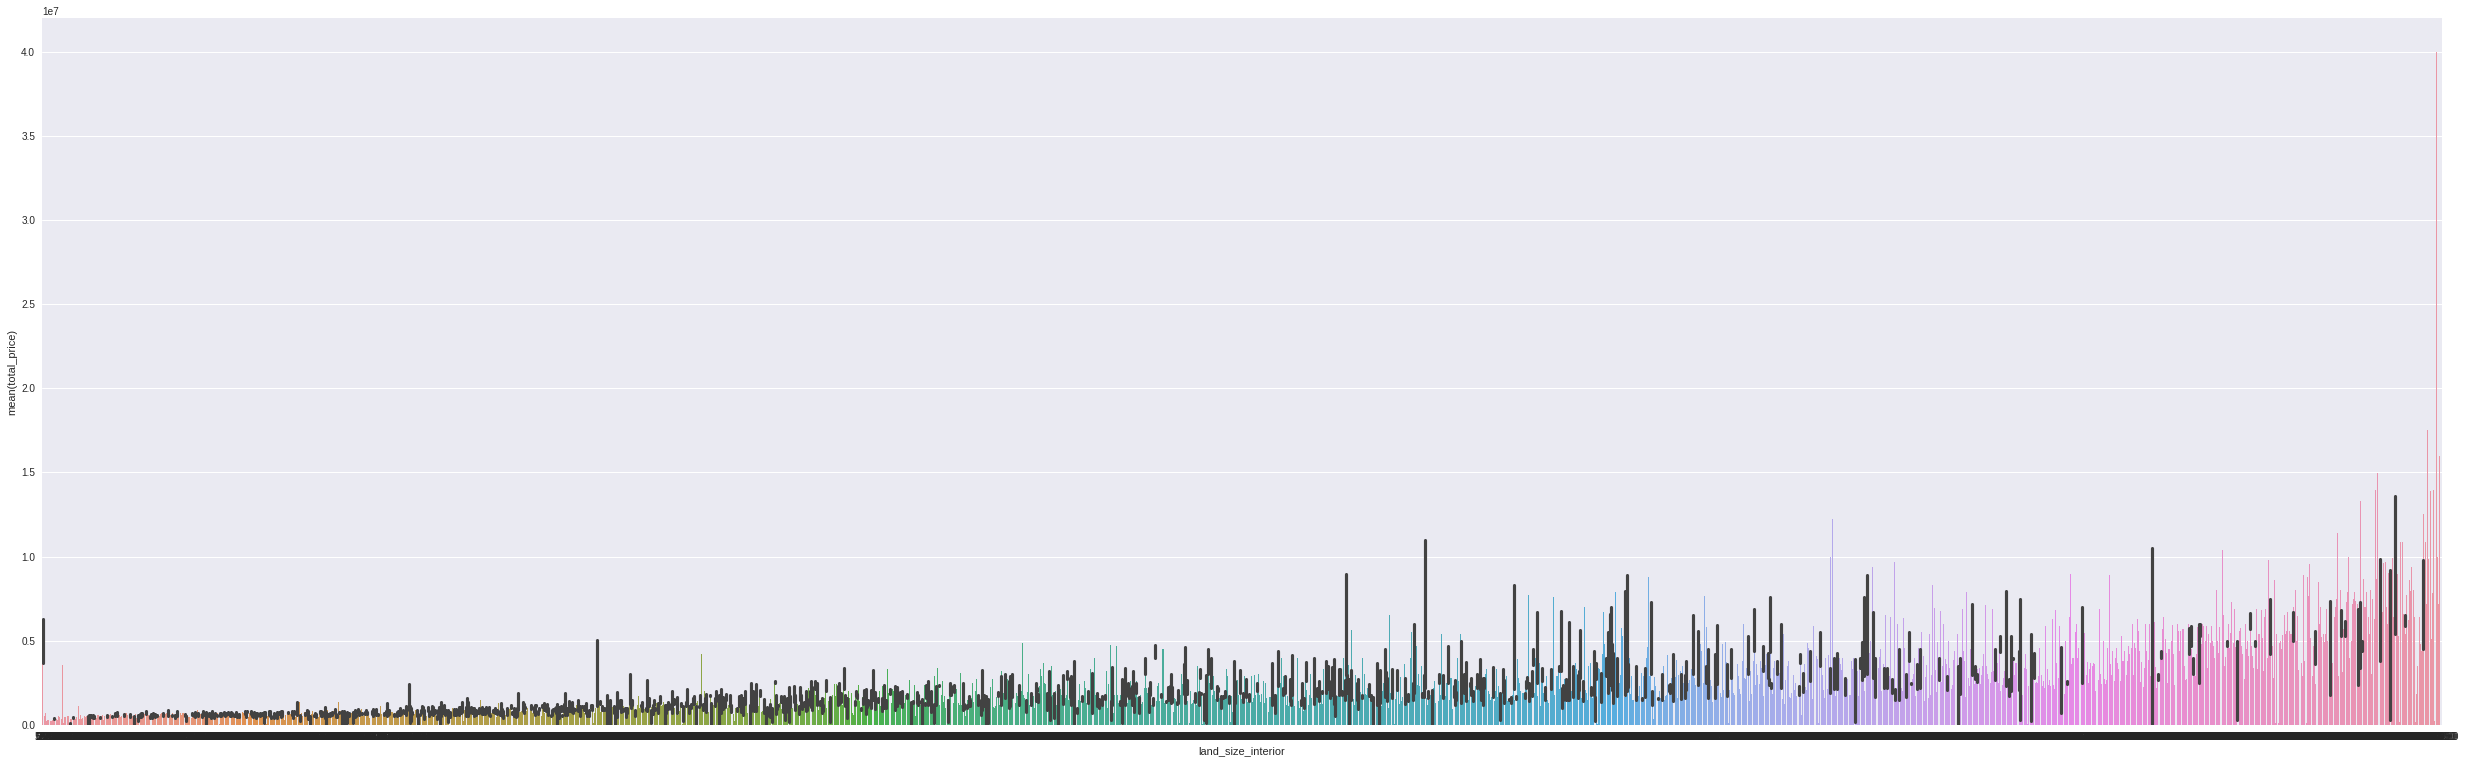

In [0]:
plt.subplots(figsize=(43,13))
sns.barplot(x=numarical_train['land_size_interior'], y=numarical_train['total_price'])
#sns.show()

### The following graph explains how the price ranges are varies based on the area ( area code)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


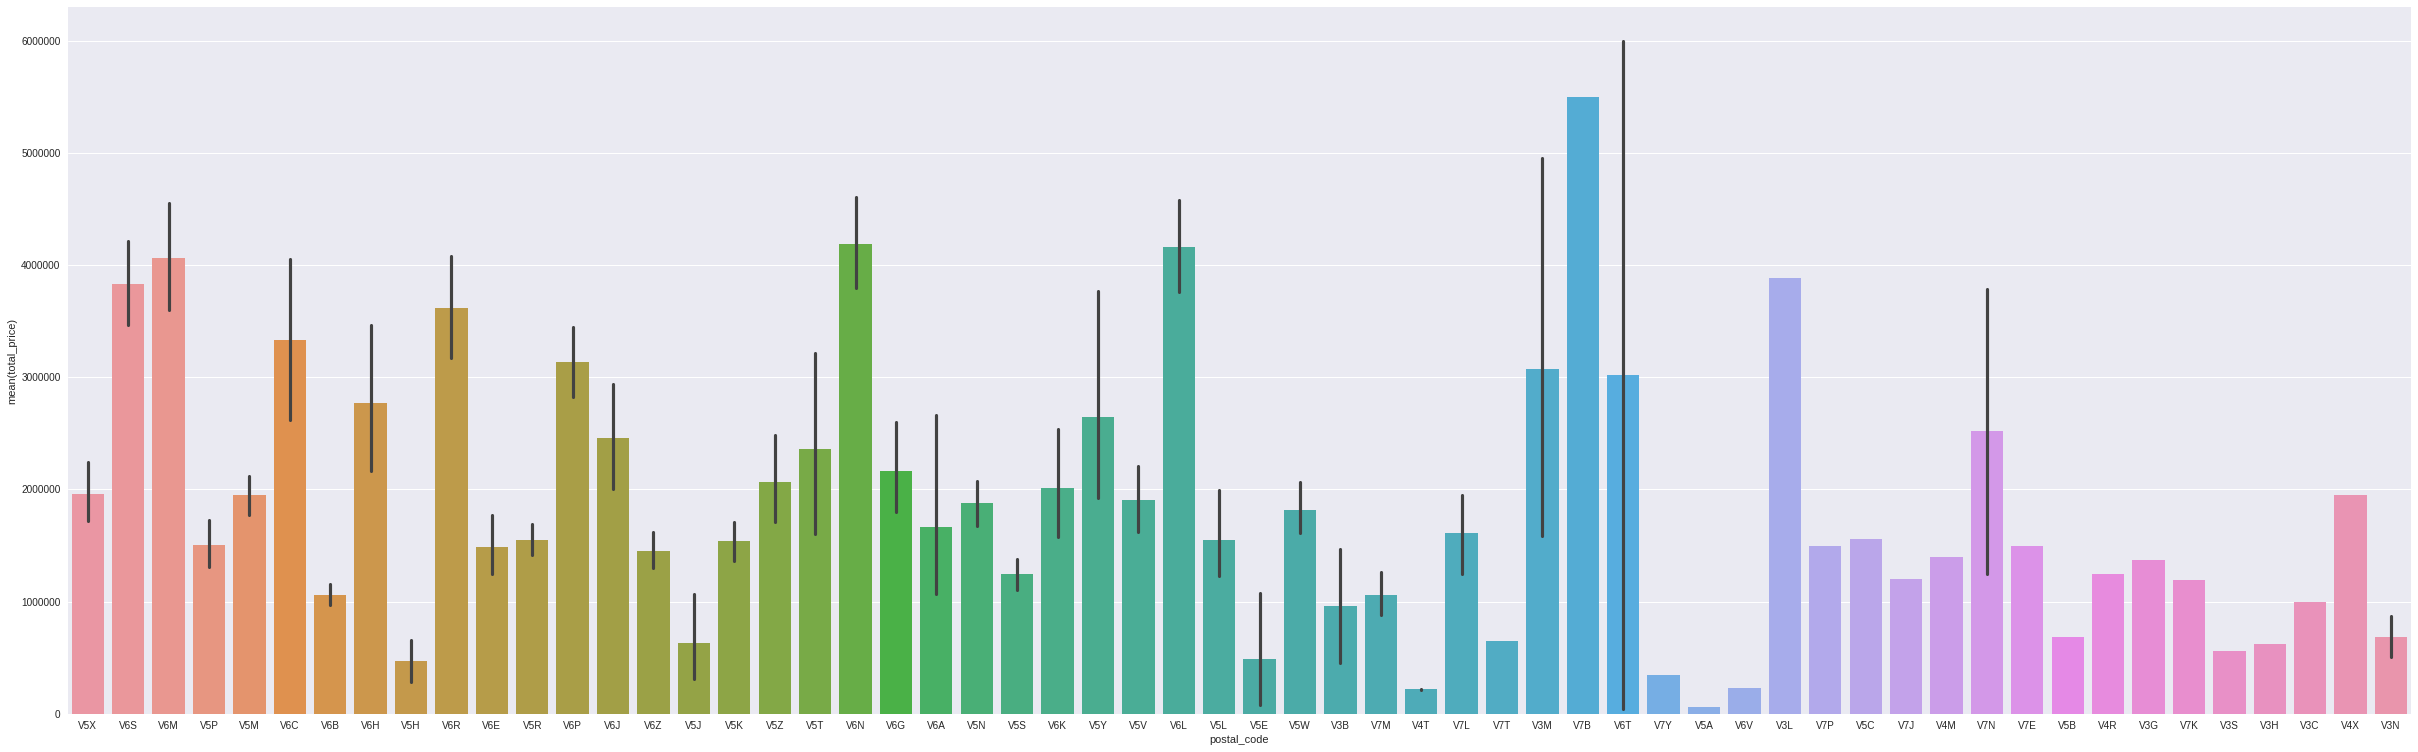

In [0]:
plt.subplots(figsize=(42,13))
sns.barplot(x=train['postal_code'], y=train['total_price'])

### The following graph explains how the actual total land size of the propertyeffects the price ranges

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


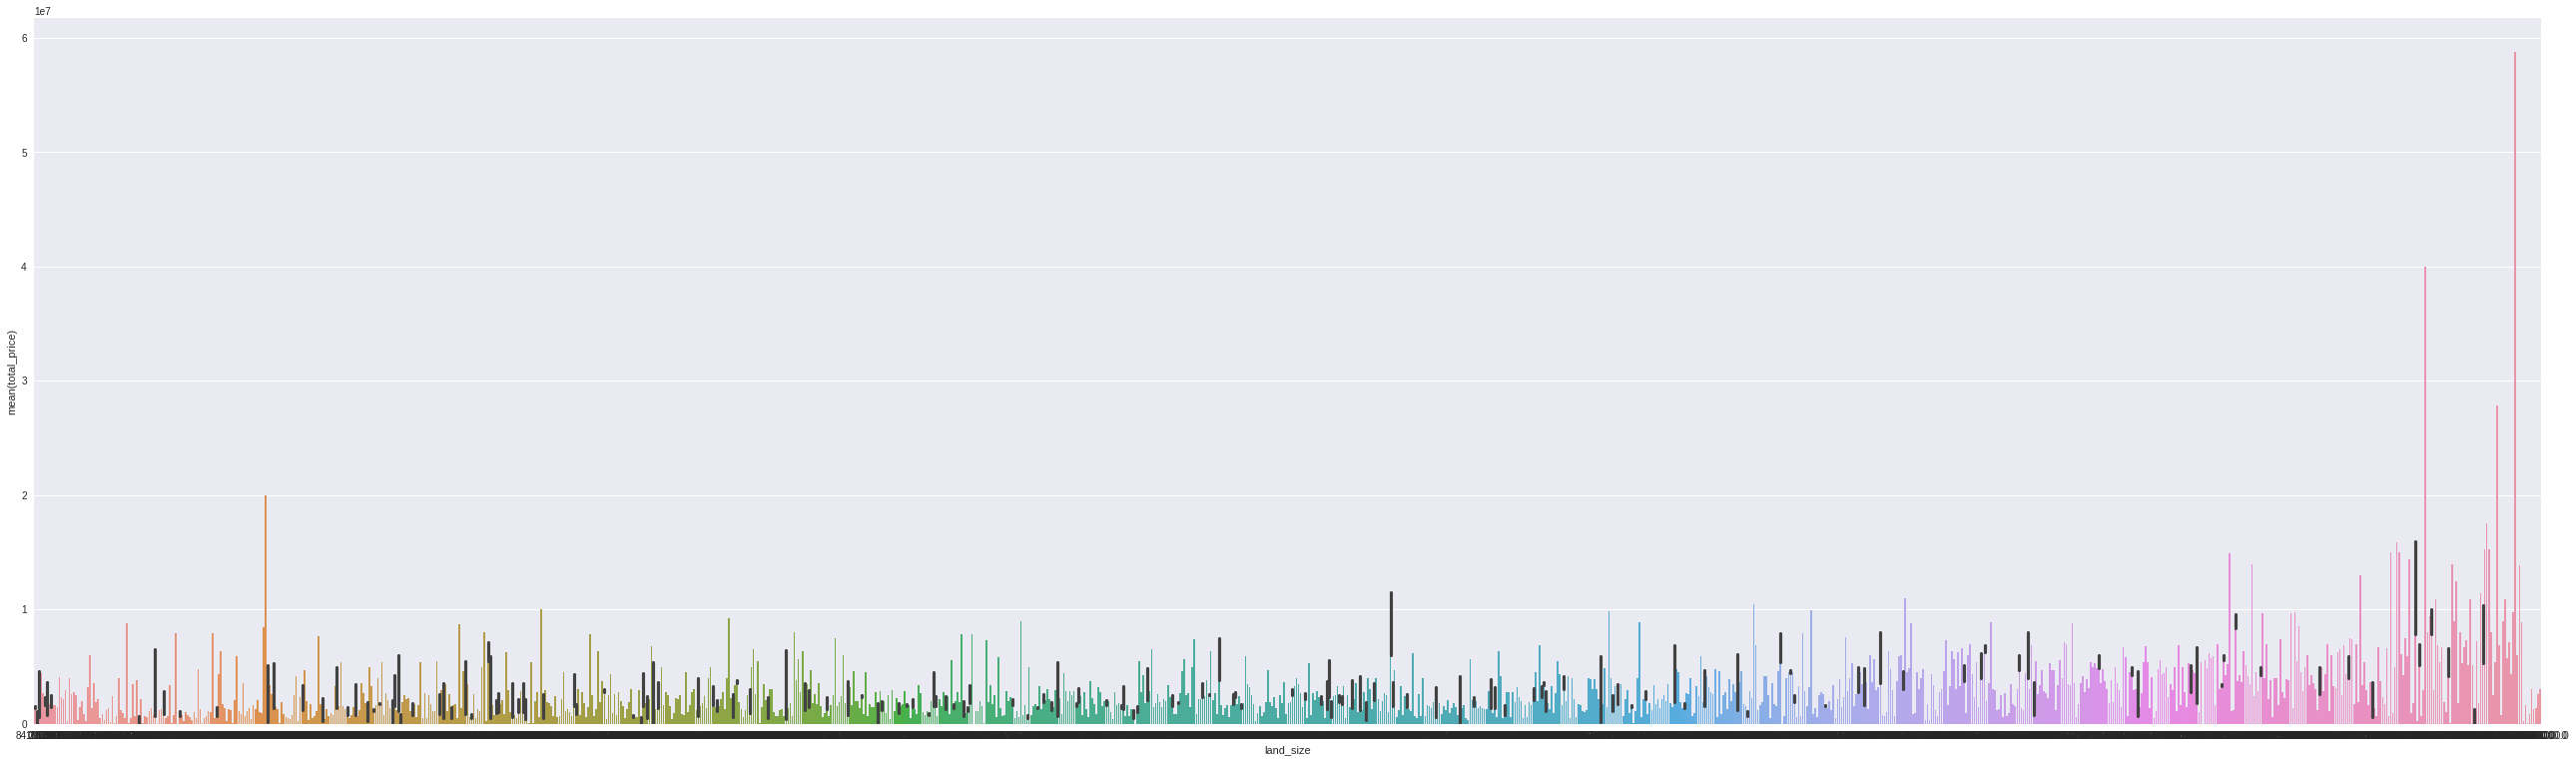

In [0]:
plt.subplots(figsize=(45,13))
sns.barplot(x=numarical_train['land_size'], y=numarical_train['total_price'])

### The following graph explains how the leagl type of the property effects the price ranges

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


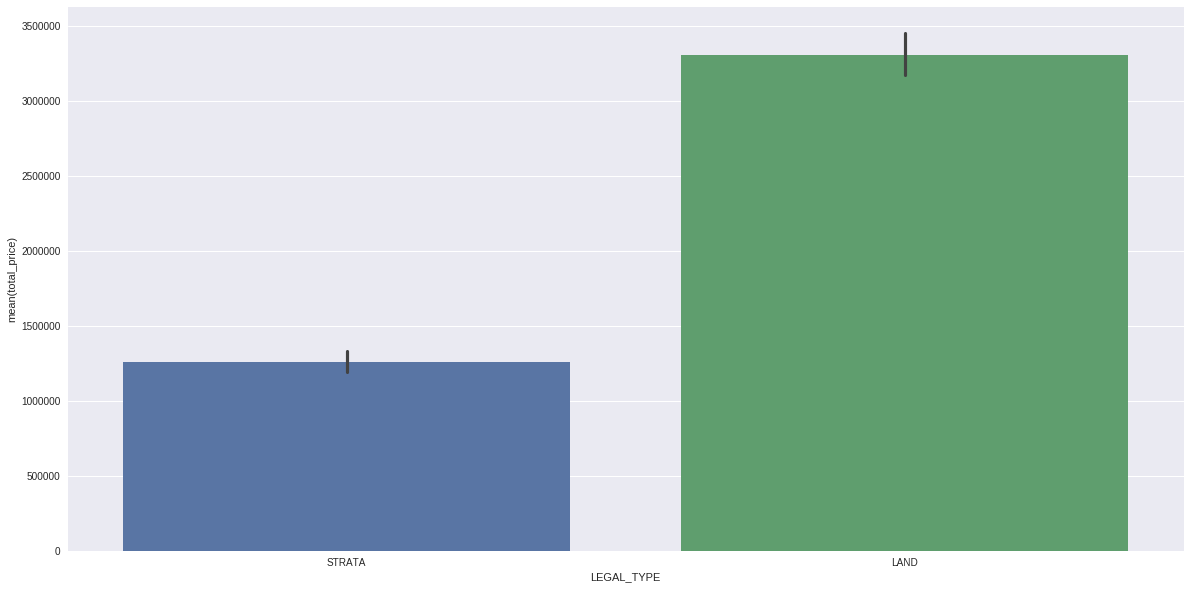

In [0]:
plt.subplots(figsize=(20,10))
sns.barplot(x=train['LEGAL_TYPE'], y=train['total_price'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


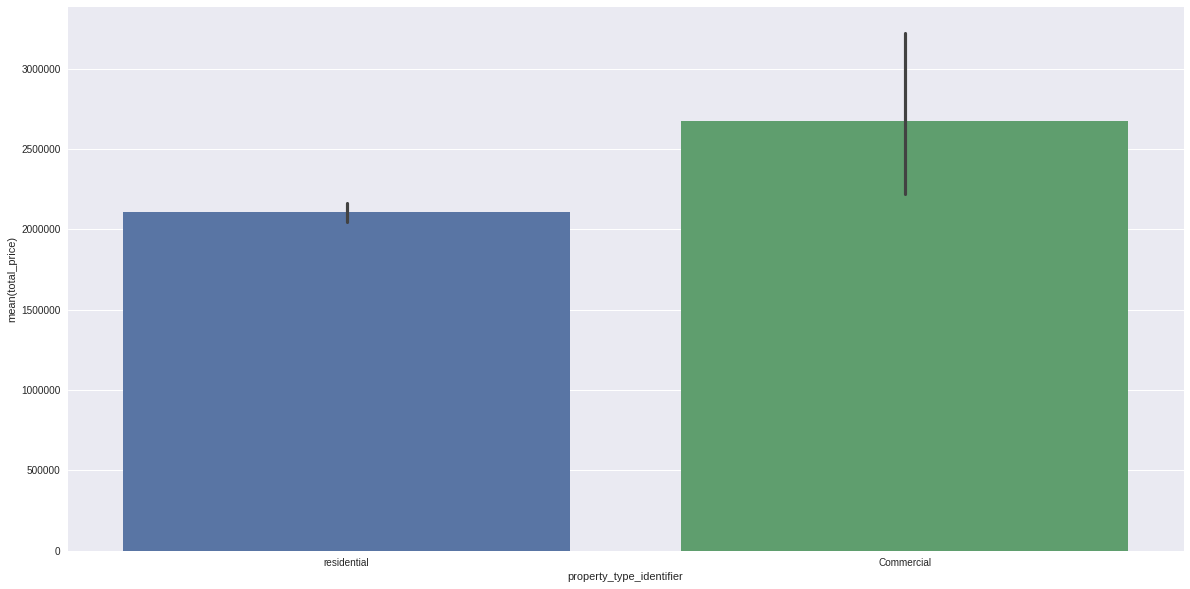

In [0]:
plt.subplots(figsize=(20,10))
sns.barplot(x=train['property_type_identifier'], y=train['total_price'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


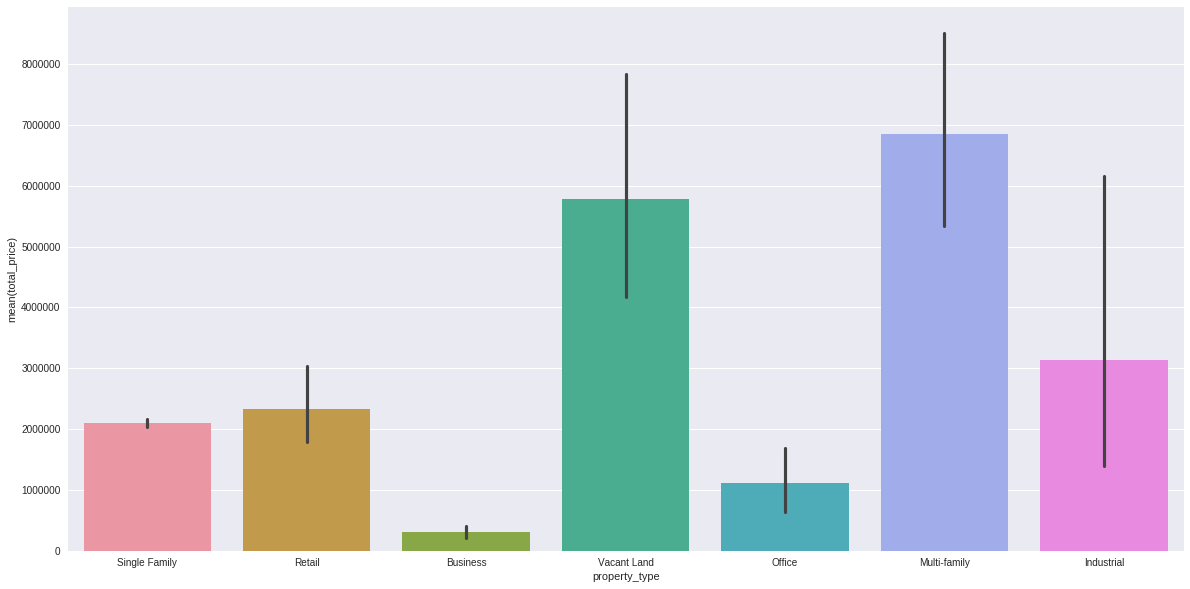

In [0]:
plt.subplots(figsize=(20,10))
sns.barplot(x=train['property_type'], y=train['total_price'])

In [0]:
frames = [numarical_train, new_catogorical_train]

In [0]:
train = pd.concat(frames, axis =1)

In [0]:
nan=(np.isnan(train).sum(axis=0))/len(train)
nan*100

cafes                         0.000000
car_friendly                  0.000000
cycling_friendly              0.000000
daycares                      0.000000
groceries                     0.000000
high_schools                  0.000000
nightlife                     0.000000
parks                         0.000000
pedestrian_friendly           0.000000
primary_schools               0.000000
quiet                         0.000000
restaurants                   0.000000
shopping                      0.000000
transit_friendly              0.000000
vibrant                       0.000000
bathrooms                     0.000000
bedrooms                      0.000000
land_size                     0.057654
land_size_interior            0.000000
built_in                      0.144134
property_tax                  0.057654
CURRENT_LAND_VALUE            0.000000
BIG_IMPROVEMENT_YEAR          0.000000
CURRENT_IMPROVEMENT_VALUE     0.000000
PREVIOUS_IMPROVEMENT_VALUE    0.000000
PREVIOUS_LAND_VALUE      

In [0]:
np.any(np.isnan(catogorical_train))

False

In [0]:
np.all(np.isfinite(catogorical_train))

True

In [0]:
train['land_size'] = train['land_size'].interpolate(method = 'linear')
train['built_in'] = train['built_in'].interpolate(method = 'linear')

train['property_tax'] = train['property_tax'].interpolate(method = 'linear')



In [0]:
train=train.dropna()

In [0]:
nan=(np.isnan(train).sum(axis=0))/len(train)
nan*100

cafes                         0.0
car_friendly                  0.0
cycling_friendly              0.0
daycares                      0.0
groceries                     0.0
high_schools                  0.0
nightlife                     0.0
parks                         0.0
pedestrian_friendly           0.0
primary_schools               0.0
quiet                         0.0
restaurants                   0.0
shopping                      0.0
transit_friendly              0.0
vibrant                       0.0
bathrooms                     0.0
bedrooms                      0.0
land_size                     0.0
land_size_interior            0.0
built_in                      0.0
property_tax                  0.0
CURRENT_LAND_VALUE            0.0
BIG_IMPROVEMENT_YEAR          0.0
CURRENT_IMPROVEMENT_VALUE     0.0
PREVIOUS_IMPROVEMENT_VALUE    0.0
PREVIOUS_LAND_VALUE           0.0
TAX_ASSESSMENT_YEAR           0.0
TAX_LEVY                      0.0
YEAR_BUILT                    0.0
total_price   

### training score 

In [0]:
from sklearn import ensemble
lr = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor,GradientBoostingClassifier
for learning_rates in lr:
    gbt =GradientBoostingRegressor(n_estimators=100, learning_rate = learning_rates, max_features=2, max_depth = 2, random_state = 0)
#     gbt = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
#              learning_rate=0.2, loss='ls', max_depth=3,
#              max_features='auto', max_leaf_nodes=None,
#              min_impurity_decrease=0.0, min_impurity_split=None,
#              min_samples_leaf=1, min_samples_split=2,
#              min_weight_fraction_leaf=0.0, n_estimators=300,
#              presort='auto', random_state=123, subsample=1.0, verbose=0,
#              warm_start=False)
    gbt.fit(x_train, y_train)
    print(gbt.score(x_train, y_train))
    print(gbt.score(x_test,y_test))
    print("newline")


0.6489596876710261
0.5941698537672487
newline
0.7586642552858511
0.6108475082701457
newline
0.8398061870405581
0.6257279381910781
newline
0.8820989351497741
0.49474915040941747
newline
0.8939109625358093
0.43451806582091146
newline
0.896239322602485
-0.5107526691853881
newline


In [0]:
resut_prid
tct= gbt.predict(x)

# RMSE & R^2

In [0]:
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
y_pred = gbt.predict(x_test)

rmse = sqrt(mean_squared_error(y_test, y_pred)) 
r2 = r2_score(y_test, y_pred)

print("Gradient Boost Regression Scores- rmse:",rmse," r2:",r2)

# Normalise Root Mean Square Error(NRMSE)

In [0]:
NRMSE = rmse/(train.total_price.max() -  train.total_price.min())
print('Normalise Root Mean Square Error(NRMSE)',NRMSE)

In [0]:
for i in resut_pridtct:
  print(i)

76893572.40689738
76022103.15863328
74939294.03434616
76188347.08603671
76407993.31398918
74954923.0072176
76629058.1698509
72545169.0519308
78799166.28470124
75529053.43661705
76426647.69598927
74954923.0072176
77346095.97792968
81686919.90787725
76203976.05890815
76500934.34522797
75399322.83077472
80471832.7802746
76207788.99884321
76537723.9198315
76407993.31398918
76926016.45617072
74502399.4361853
77737545.34416066
63250031.463216245
77346095.97792968
74502399.4361853
76407993.31398918
76485305.37235653
76500934.34522797
80128718.31487273
76629058.1698509
64258701.946430705
77721916.37128922
75399322.83077472
80128718.31487273
75383693.85790329
76506829.24368657
76392364.34111774
76485305.37235653
76281288.1172755
76188347.08603671
74502399.4361853
76500934.34522797
79010747.85184798
74502399.4361853
76485305.37235653
75383693.85790329
76522458.21655801
76485305.37235653
75399322.83077472
76506829.24368657
79140478.4576903
76721999.2010897
76833075.42493193
78875946.43321744
7640